Rizki Wahyu Yulianti - A11.2022.14212

In [ ]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Mengimpor pustaka pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ganti path berikut dengan lokasi file CSV di Google Drive
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
df.head()

Mounted at /content/drive


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


 Untuk melihat struktur kolom, tipe data (object, int, float), dan apakah ada missing value.

In [ ]:
# Melihat info umum dataset: jumlah kolom, tipe data, non-null count
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Memberikan ringkasan statistik seperti mean, std, min, max, dan frekuensi kategori terbanyak.

In [ ]:
# Statistik deskriptif seluruh kolom (numerik dan kategorikal)
df.describe(include='all')


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


 Menampilkan jumlah data untuk setiap label obesitas, apakah datanya seimbang atau tidak.

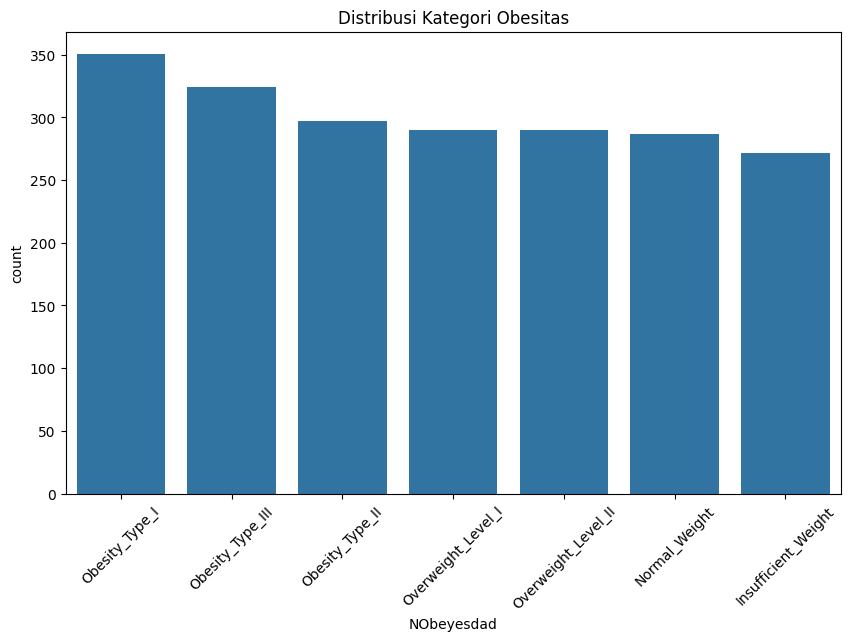

In [ ]:
# Visualisasi jumlah data per kategori obesitas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()


 Scatterplot menunjukkan hubungan antara tinggi dan berat serta distribusinya terhadap kelas obesitas.

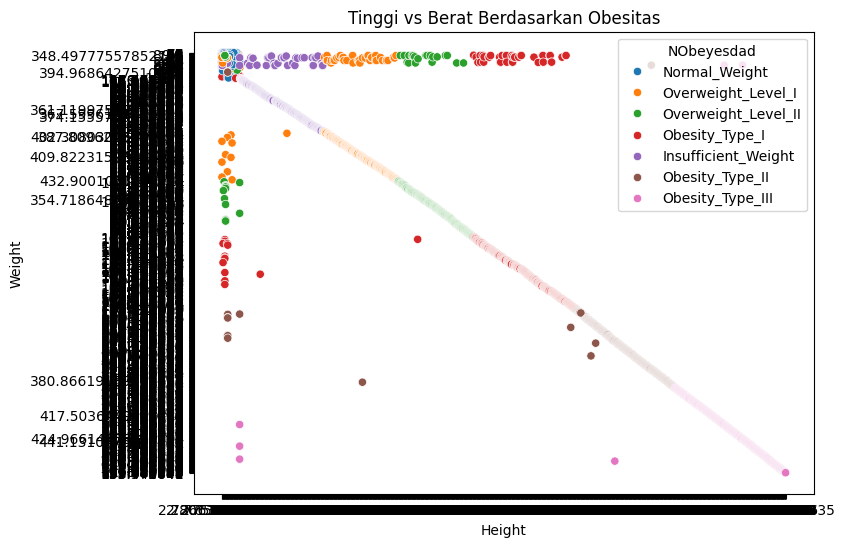

In [ ]:
# Visualisasi hubungan tinggi dan berat badan berdasarkan kelas obesitas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad')
plt.title('Tinggi vs Berat Berdasarkan Obesitas')
plt.show()



In [ ]:
# Mengecek apakah ada nilai kosong (missing values),  Menampilkan jumlah missing value per kolom.
df.isnull().sum()


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [ ]:
# Melihat jumlah nilai unik di setiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [ ]:
# Mengecek jumlah data yang duplikat
print("\nDuplikasi:", df.duplicated().sum())



Duplikasi: 18


Boxplot menunjukkan data ekstrem (outlier), ditandai dengan titik di luar garis whisker.

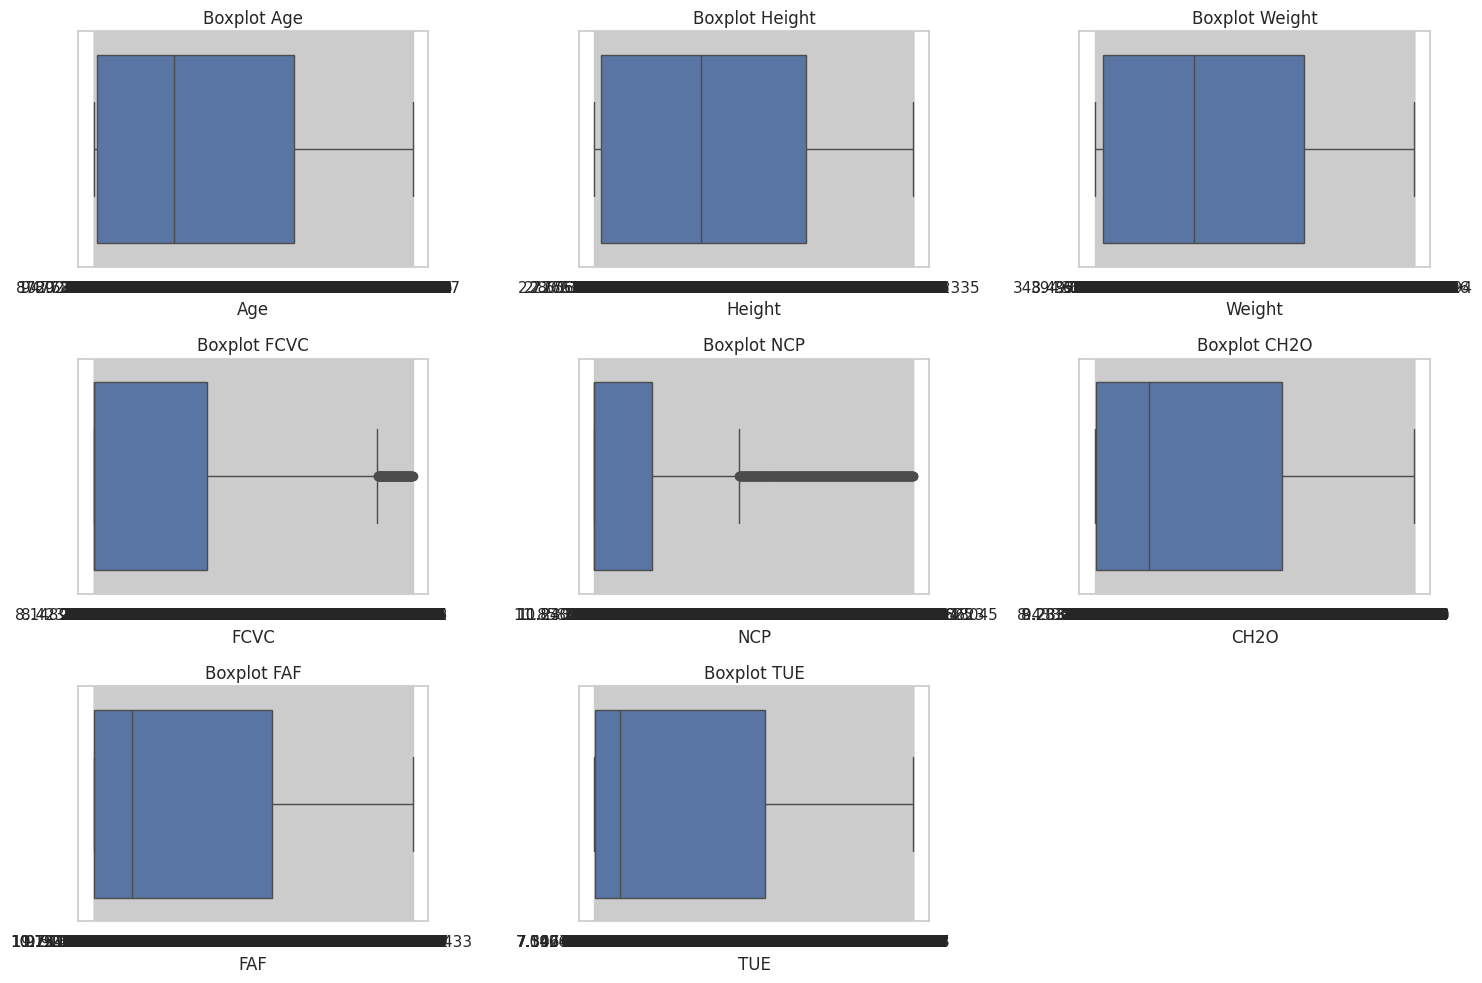

In [ ]:
# Menampilkan boxplot untuk kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


Melihat distribusi kategori obesitas seimbang. Kalau tidak seimbang, nanti bisa diatasi dengan SMOTE atau undersampling.


In [ ]:
# Melihat distribusi kelas target dalam persen
df['NObeyesdad'].value_counts(normalize=True) * 100


,proportion
NObeyesdad,
Obesity_Type_I,16.627191
Obesity_Type_III,15.348176
Obesity_Type_II,14.069162
Overweight_Level_I,13.737565
Overweight_Level_II,13.737565
Normal_Weight,13.595452
Insufficient_Weight,12.884889


## Kesimpulan Preprocessing Data

- Tidak ditemukan missing value dalam dataset.
- Nilai duplikat telah dihapus.
- Outlier dideteksi dan dibuang menggunakan metode IQR.
- Semua fitur kategorikal telah diubah menjadi numerik menggunakan one-hot encoding.
- Label target (`NObeyesdad`) telah diubah menjadi format numerik dengan `LabelEncoder`.
- Kelas target yang sebelumnya tidak seimbang, telah diseimbangkan menggunakan metode `SMOTE`.
- Data telah dinormalisasi menggunakan `StandardScaler` untuk memastikan keseragaman skala antar fitur.
- Dataset kini siap digunakan untuk proses training dan evaluasi model klasifikasi.
